# Employee Turnover Prediction

In [114]:
# Dataset = "https://www.kaggle.com/datasets/akshayhedau/employee-turnover-analytics-dataset"

In [115]:
# Importing the libraries

import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore", category=FutureWarning)

In [116]:
# Reading in the data

df = pd.read_csv(r"/Users/shrutidua/Downloads/dataset.csv")


In [117]:
# Looking at the data

pd.set_option('display.max_columns', None)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [118]:
# Looking at the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [119]:
# Shape of dataset

df.shape

(14999, 10)

# Data Cleaning

In [120]:
# Looking for missing values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [121]:
# Checking for duplicates

df.duplicated(keep="first").sum()

3008

In [122]:
# Dropping the duplicate rows

df = df.drop_duplicates()

In [123]:
df.shape

(11991, 10)

In [124]:
df = df.rename(columns={'average_montly_hours': 'average_monthly_hours', "sales": "position", 
                        "promotion_last_5years":"promotion_last_5_years", "time_spend_company":"years_spent_at_company",
                       "number_project":"number_of_projects", "Work_accident":"work_accidents", 
                        "last_evaluation":"last_evaluation_score"})
df.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,position,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

<Axes: >

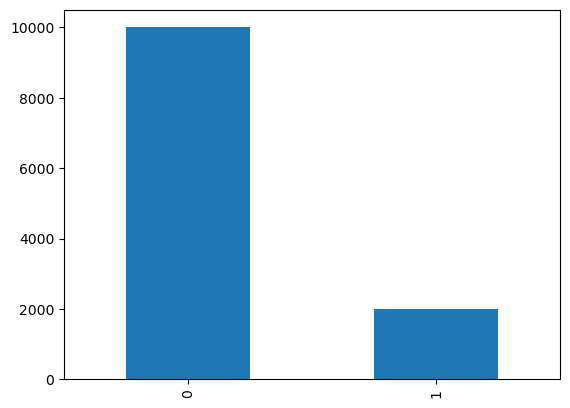

In [125]:
# Visualizing our target variable

df["left"].value_counts().plot(kind = "bar")

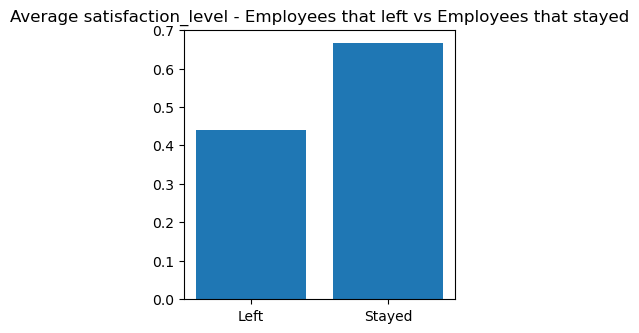

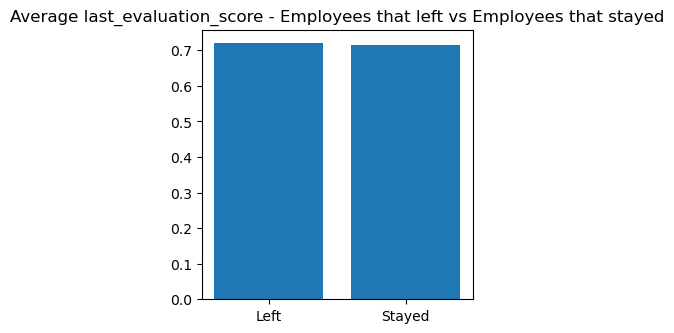

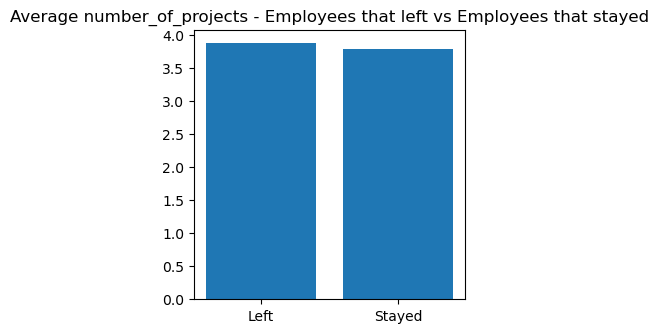

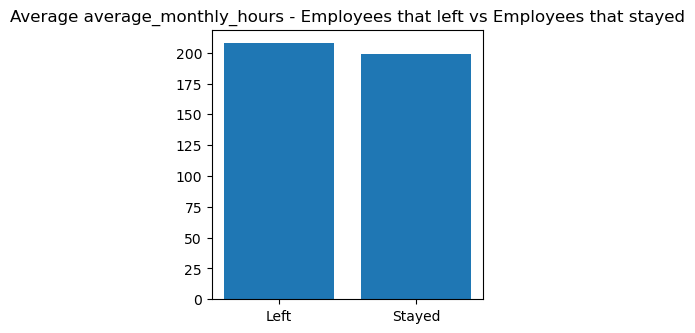

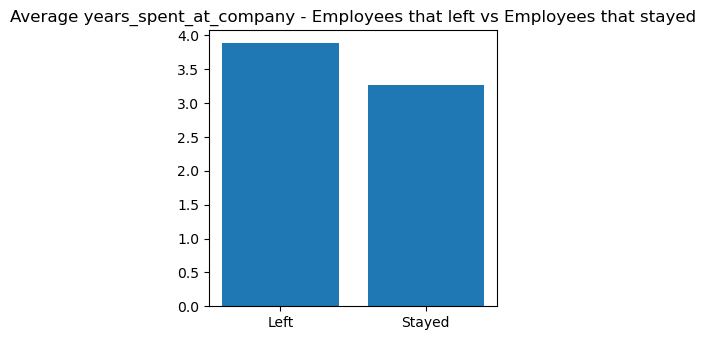

In [126]:
# Comparing average values of numeric variables for employees who left vs who didn't
column_list = ["satisfaction_level", "last_evaluation_score", "number_of_projects", "average_monthly_hours", "years_spent_at_company"] 
# Splitting the dataset by the "left" column
left = df[df["left"] == 1]
stayed = df[df["left"] == 0]
for var in column_list:
# Mean Satisfaction level of those who left and those who stayed
    var_left = left[var].mean()
    var_stayed = stayed[var].mean()

    # Labels
    categories = ['Left', 'Stayed']

    # Bar Chart
    plt.figure(figsize=(3.5, 3.5))
    plt.bar(categories, [var_left, var_stayed])
    plt.title(f"Average {var} - Employees that left vs Employees that stayed")
plt.tight_layout()
plt.show()

We can see that satisfaction level and years spent at company are strong indicators of employee turnover. 
We will now look at standard deviation as well since the number of "left data points we have are much less than "stayed" data points.

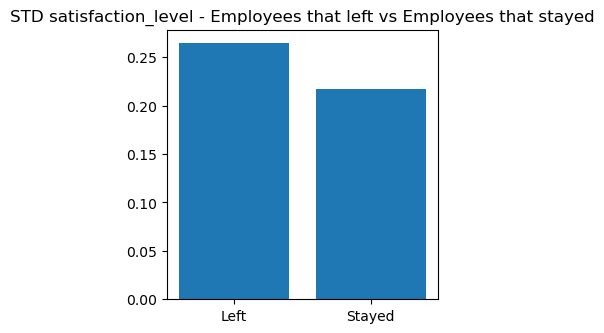

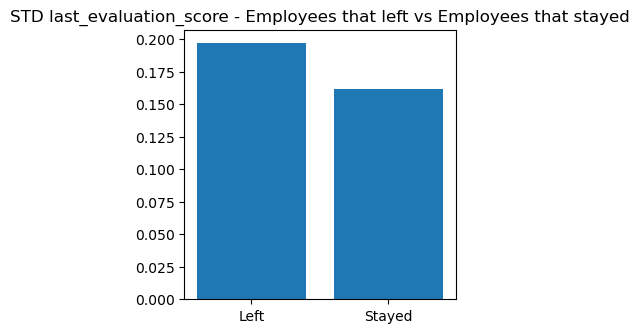

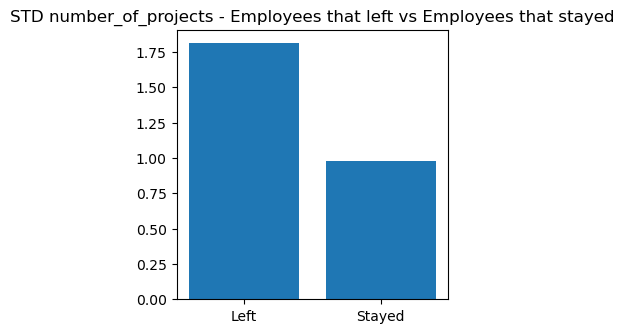

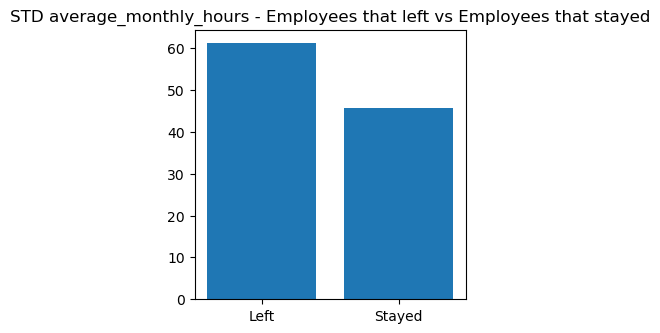

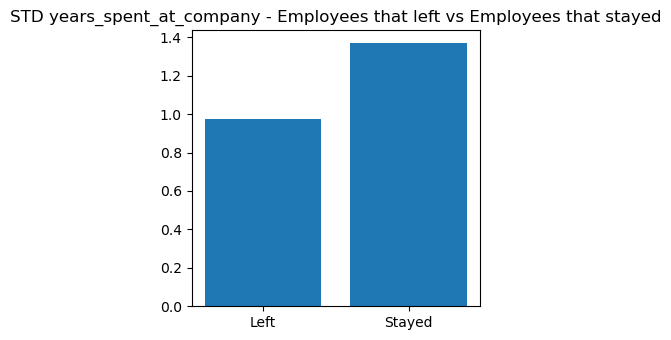

In [127]:
# Comparing Standard Deviation values of numeric variables for employees who left vs who didn't
column_list = ["satisfaction_level", "last_evaluation_score", "number_of_projects", "average_monthly_hours", "years_spent_at_company"] 
# Splitting the dataset by the "left" column
left = df[df["left"] == 1]
stayed = df[df["left"] == 0]
for var in column_list:
# Mean Satisfaction level of those who left and those who stayed
    var_left = left[var].std()
    var_stayed = stayed[var].std()

    # Labels
    categories = ['Left', 'Stayed']

    # Bar Chart
    plt.figure(figsize=(3.5, 3.5))
    plt.bar(categories, [var_left, var_stayed])
    plt.title(f"STD {var} - Employees that left vs Employees that stayed")
plt.tight_layout()
plt.show()

Hence, it is clear that the "left" data points are much more spread out in all categories except years spent at company hence we can assume that years spent at company is a strong indicator of turnover

# Number of projects

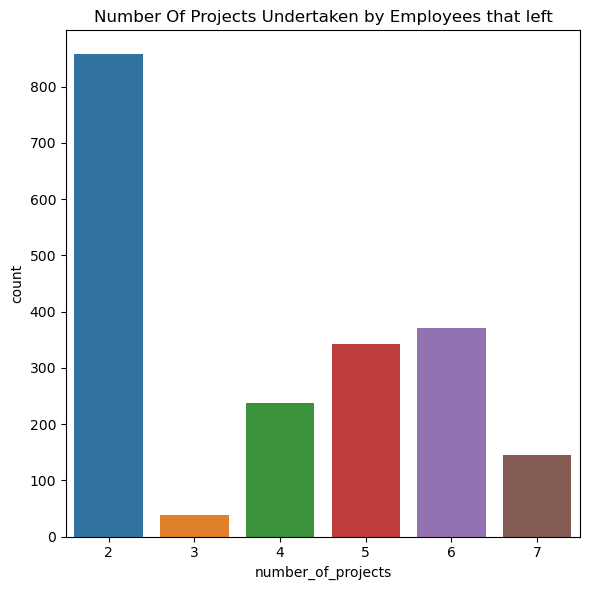

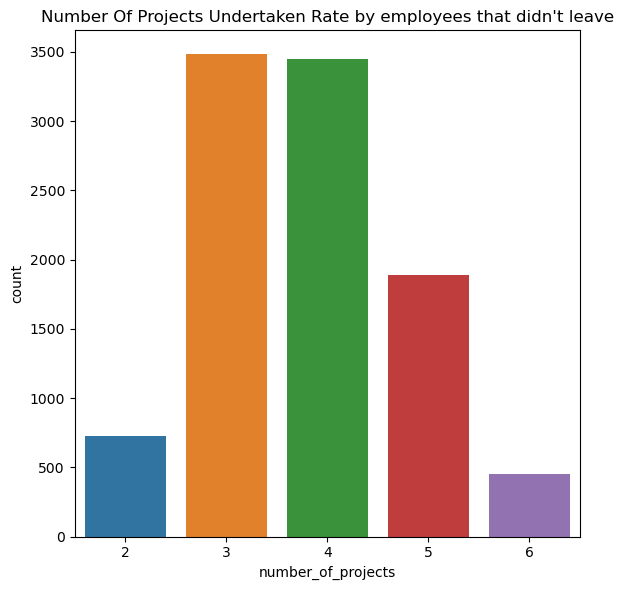

In [128]:
# Number Of Projects Undertaken by Employees divided by whether or not they left the company

plt.figure(figsize=(6, 6))
sns.countplot(data=left, x="number_of_projects")
plt.title("Number Of Projects Undertaken by Employees that left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(data=stayed, x="number_of_projects")
plt.title("Number Of Projects Undertaken Rate by employees that didn't leave")
plt.tight_layout()
plt.show()

# Promotion in last 5 years

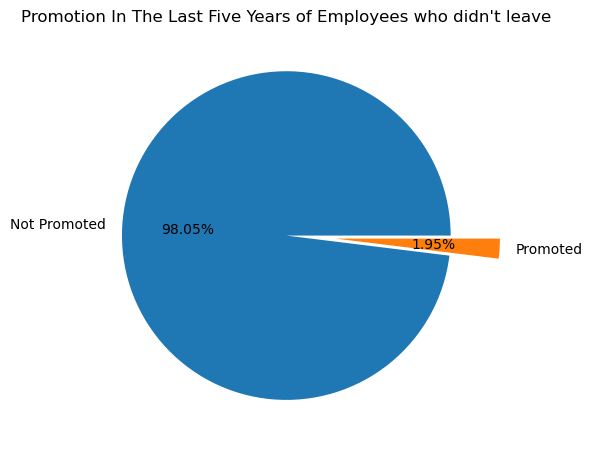

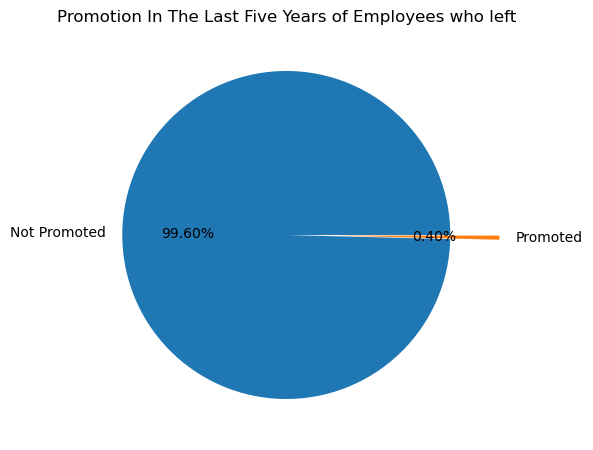

In [129]:
# Comparing promotions between those who stayed and left
labels = df["promotion_last_5_years"].value_counts().index.tolist()
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
# Those who stayed
plt.figure(figsize=(6, 6))
plt.pie(x = stayed["promotion_last_5_years"].value_counts(),labels = labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
plt.pie(x = left["promotion_last_5_years"].value_counts(), labels = labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who left")
plt.tight_layout()
plt.show()

# Salary level

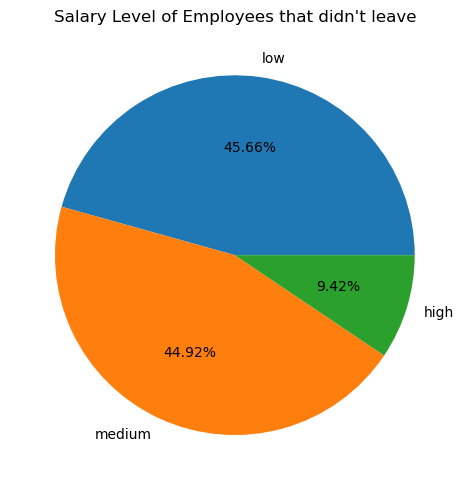

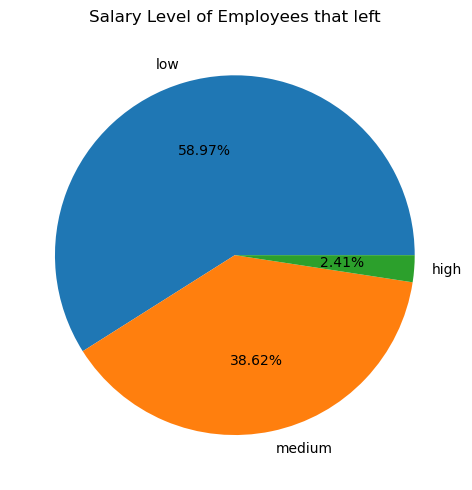

In [130]:
# Salary distribution of employees divided by the employees who left and who didn't

labels = df["salary"].value_counts().index.tolist()

# Those who stayed
plt.figure(figsize=(5, 5))
plt.pie(x = stayed["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(5, 5))
plt.pie(x = left["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that left")
plt.tight_layout()
plt.show()

# Employee Position

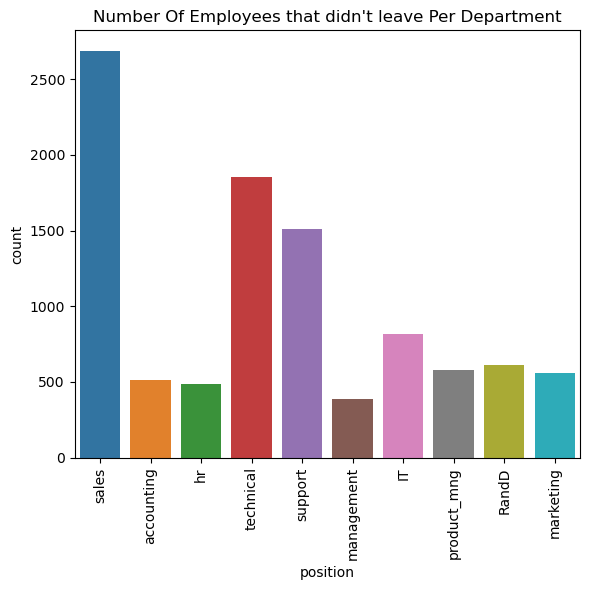

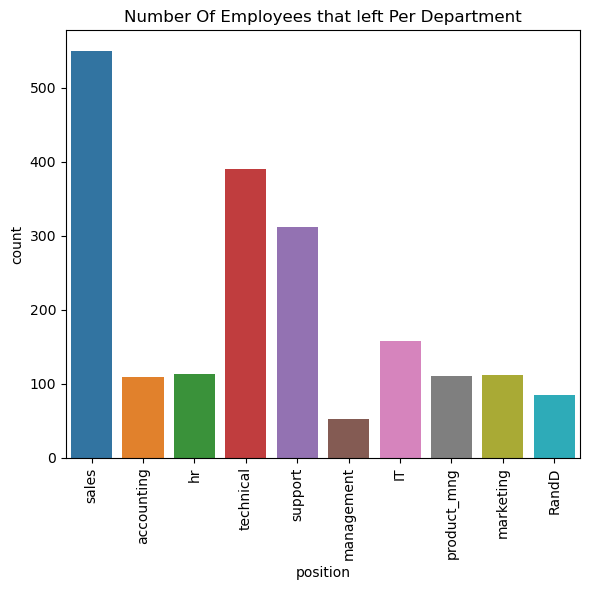

In [131]:
# Looking at the department division of those who left and those who didn't

# Those who stayed
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=stayed)
plt.title("Number Of Employees that didn't leave Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=left)
plt.title("Number Of Employees that left Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see Sales, Technical, Support, IT, and product management are the top positions that have a high count of employee turnover. Let us analyse the number of employees by position that have had low salary to the average number of years they have spent at the company to come up with a reason for these positions being top employee bleeders. It is important to also look at this attribute as a proportion of total employees in that position because there might be an imbalance in number of employees collected in the sample per position

In [132]:
low_salary_df = df[df['salary'] == 'low']

# Group by position to calculate count of employees with low salary and average years
low_salary_stats = low_salary_df.groupby('position').agg(
    Low_Count=pd.NamedAgg(column='salary', aggfunc='count'),
    Average_Years=pd.NamedAgg(column='years_spent_at_company', aggfunc='mean')
)

# Calculate total employees by position from the entire DataFrame
total_employees = df.groupby('position')['salary'].count()

# Merge the low salary stats with total employees count
result_table = low_salary_stats.join(total_employees.rename('Total_Employees'))

# Calculate the proportion of low salary employees
result_table['Low_Salary_Proportion'] = result_table['Low_Count'] / result_table['Total_Employees']

print(result_table)

             Low_Count  Average_Years  Total_Employees  Low_Salary_Proportion
position                                                                     
IT                 476       3.319328              976               0.487705
RandD              322       3.335404              694               0.463977
accounting         296       3.378378              621               0.476651
hr                 296       3.195946              601               0.492512
management         139       3.280576              436               0.318807
marketing          310       3.390323              673               0.460624
product_mng        343       3.320700              686               0.500000
sales             1553       3.319382             3239               0.479469
support            867       3.344867             1821               0.476112
technical         1138       3.298770             2244               0.507130


As we can see, the average lifetime at the company of employees with low salaries in the respective positions are very similar. And by the Low_Salary_Proportion, we can conclude technical and product management are the top two employee bleeder positions

# Data pre-processing

In [133]:
# Categorial encoding

columns = ["position", "salary"]
new_columns = pd.get_dummies(df[columns], prefix="type")

In [134]:
new_columns.head()

,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [135]:
df = df.join(new_columns)
df.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,position,salary,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [136]:
# Dropping the columns we have encoded

df.drop(["position", "salary"], inplace=True, axis= 1)
df.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Seperating data into predictors and target values

In [137]:
X = df.drop("left", axis=1)
y = df["left"]

In [138]:
X.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,promotion_last_5_years,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Splitting data into training and test data

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [140]:
X_train.shape

(9592, 20)

In [141]:
X_test.shape

(2399, 20)

# Logistic Regression

# Training the model

In [142]:
# Creating the model
logistic = LogisticRegression(max_iter=2000)

# Training the model on the training data
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [143]:
# Predict the target values of the test data using the model

y_pred_lr = logistic.predict(X_test)

# Evaluation of the model

In [144]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8311796581909129
Precision: 0.5052631578947369
Recall: 0.23587223587223588
F1 score: 0.3216080402010051


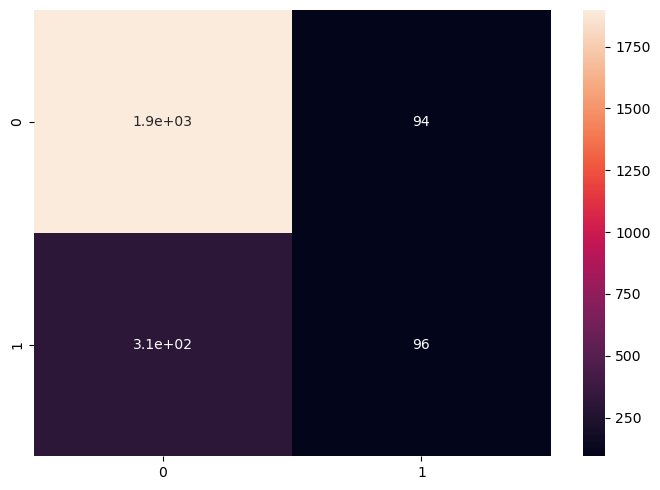

In [145]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [146]:
# As we can see, the Logistic Regression model is giving a large number of false positives. 
# Therefore, applying more models to get the best outcome is important.

# Random forrest 

# Training the model

In [147]:
# Creating the model
randf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Training the model on the training data
randf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [148]:
# Predict the target values of the test data using the model

y_pred_rf = randf.predict(X_test)

# Evaluation of the model

In [149]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9824927052938724
Precision: 0.9840848806366048
Recall: 0.9115479115479116
F1 score: 0.9464285714285715


In [150]:
# Classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1992
           1       0.98      0.91      0.95       407

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



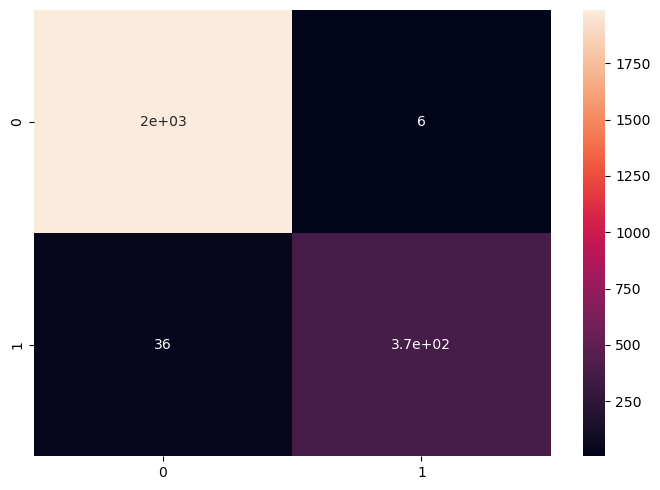

In [151]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

# Xgboost

In [152]:
# Creating the model
xgb = XGBClassifier()

# Training the model on the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
# Predict the target values of the test data using the model

y_pred_xg = xgb.predict(X_test)

# Evaluation of the model

In [154]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9837432263443101
Precision: 0.9717948717948718
Recall: 0.9312039312039312
F1 score: 0.9510664993726474


In [155]:
# Classification report

print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1992
           1       0.97      0.93      0.95       407

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



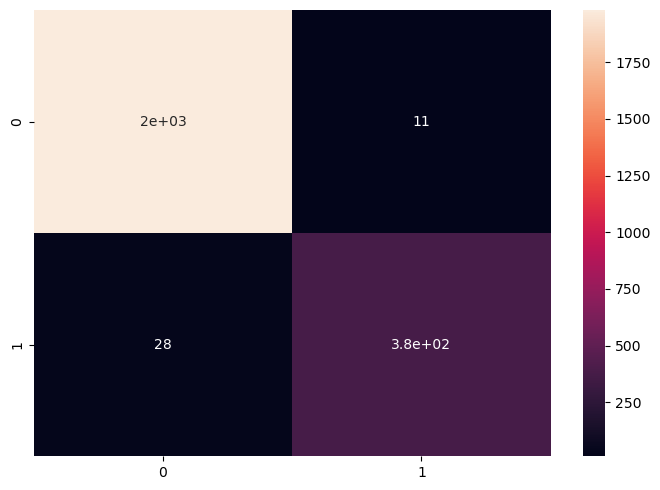

In [156]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()